<a href="https://colab.research.google.com/github/bigirimanainnocent12/Regresion_lineaire/blob/main/CODE_RAPPORT_DE_STAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

try:
    latence= pd.read_excel('/content/Phase latence.xlsx')
    display(latence.head())
except FileNotFoundError:
    print("Error: 'example.xlsx' not found. Please ensure the file exists in the current directory.")
    latence = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    latence = None

,Fermenteur,debut_experience,Souche,Operateur,Milieu,Temps,T°C,Csg T,Poids,Volume,CO2,FinPhas,Vinst,Csg V,V11,V5,Acc G,Tps inject.,Code
0,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.00,18,18,1686.72,1.0,0.42,inf,0.12,inf,0.053,0.060,0.004,0,10 01/10/2020 09:59:00
1,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.33,18,18,1686.70,1.0,0.44,inf,0.06,inf,0.054,0.078,0.004,0,10 01/10/2020 09:59:00
2,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.67,18,18,1686.70,1.0,0.44,inf,0.00,inf,0.052,0.066,0.004,0,10 01/10/2020 09:59:00
3,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.00,18,18,1686.64,1.0,0.50,inf,0.18,inf,0.059,0.078,0.004,0,10 01/10/2020 09:59:00
4,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.33,18,18,1686.62,1.0,0.52,inf,0.06,inf,0.063,0.078,0.005,0,10 01/10/2020 09:59:00


In [22]:
import numpy as np

# Drop columns with a single unique value
for col in ['Fermenteur', 'Tps inject.']:
    if col in latence.columns:
        latence.drop(columns=col, inplace=True)

# Replace infinite values with NaN
for col in ['FinPhas', 'Csg V']:
    if col in latence.columns:
        latence[col] = latence[col].replace([np.inf, -np.inf], np.nan)

# Remove columns with a high percentage of missing values (e.g., >90%)
threshold = 0.9
for col in latence.columns:
  if latence[col].isnull().sum() / len(latence) > threshold:
    latence.drop(columns=col, inplace=True)


# Convert discretized numerical features to categorical (example with 'Volume' as it's likely discretized)
for col in ['T°C', 'Csg T', 'Volume']:
    if col in latence.columns:
        if latence[col].nunique() < 10: # Consider a column discretized if it has less than 10 unique values. Adjust as needed.
            latence[col] = latence[col].astype('category')

display(latence.head())


,debut_experience,Souche,Operateur,Milieu,Temps,T°C,Csg T,Poids,Volume,CO2,Vinst,V11,V5,Acc G,Code
0,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.00,18,18,1686.72,1.0,0.42,0.12,0.053,0.060,0.004,10 01/10/2020 09:59:00
1,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.33,18,18,1686.70,1.0,0.44,0.06,0.054,0.078,0.004,10 01/10/2020 09:59:00
2,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.67,18,18,1686.70,1.0,0.44,0.00,0.052,0.066,0.004,10 01/10/2020 09:59:00
3,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.00,18,18,1686.64,1.0,0.50,0.18,0.059,0.078,0.004,10 01/10/2020 09:59:00
4,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.33,18,18,1686.62,1.0,0.52,0.06,0.063,0.078,0.005,10 01/10/2020 09:59:00


In [23]:
latence.drop(columns=['debut_experience','T°C','Volume','Operateur','Vinst','Acc G','Acc G','Csg T',"V5",'Poids'],inplace=True)

In [24]:
latence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Souche  99 non-null     object 
 1   Milieu  99 non-null     object 
 2   Temps   99 non-null     float64
 3   CO2     99 non-null     float64
 4   V11     99 non-null     float64
 5   Code    99 non-null     object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


In [25]:
latence['Souche'].unique()

array(['4010291G', '722 + FO 20+20', 'VRB e2'], dtype=object)

In [26]:
latence.groupby('Souche')['V11'].describe()

,count,mean,std,min,25%,50%,75%,max
Souche,,,,,,,,
4010291G,32.0,0.239531,0.162340,0.052,0.08975,0.210,0.3695,0.535
722 + FO 20+20,30.0,0.300900,0.166808,0.064,0.14100,0.309,0.4420,0.571
VRB e2,37.0,0.215973,0.127662,0.047,0.09400,0.199,0.3130,0.462


In [27]:
latence['Souche'].value_counts()

,count
Souche,
VRB e2,37
4010291G,32
722 + FO 20+20,30


In [28]:
data_latence=latence[latence['Souche']=='VRB e2']
data_latence.head()

,Souche,Milieu,Temps,CO2,V11,Code
62,VRB e2,Chardo PR 16,18.33,0.400,0.047,10 01/06/2017 17:09:00
63,VRB e2,Chardo PR 16,18.67,0.382,0.051,10 01/06/2017 17:09:00
64,VRB e2,Chardo PR 16,19.00,0.418,0.059,10 01/06/2017 17:09:00
65,VRB e2,Chardo PR 16,19.33,0.455,0.066,10 01/06/2017 17:09:00
66,VRB e2,Chardo PR 16,20.00,0.509,0.073,10 01/06/2017 17:09:00


# **Statistique descriptive**

In [29]:
data_latence['V11'].describe()

,V11
count,37.000000
mean,0.215973
std,0.127662
min,0.047000
25%,0.094000
50%,0.199000
75%,0.313000
max,0.462000


# **Nuage des points**

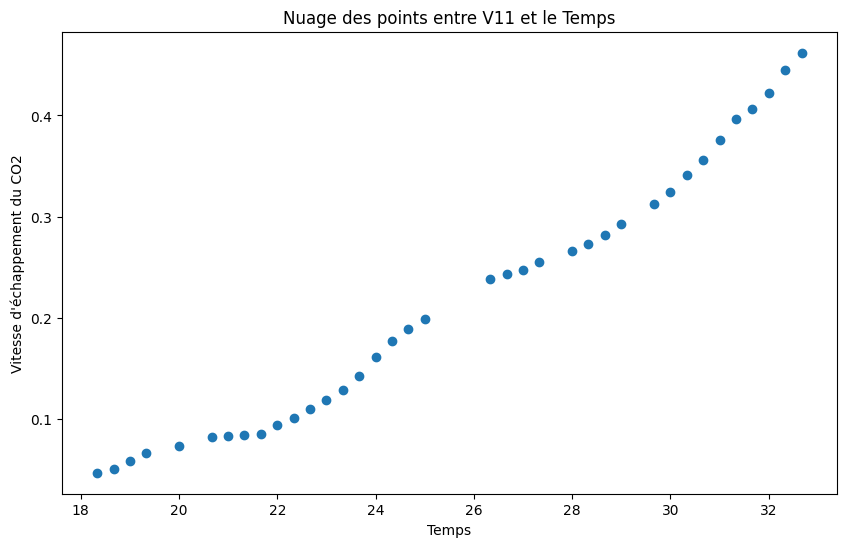

In [38]:
import matplotlib.pyplot as plt
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.scatter(data_latence['Temps'],data_latence['V11'])
plt.xlabel('Temps')
plt.ylabel("Vitesse d'échappement du CO2")
plt.title('Nuage des points entre V11 et le Temps')
plt.show()

# **Régression linéaire entre V11 et Temps**

In [33]:
import statsmodels.formula.api as sm

modele=sm.ols('V11 ~ Temps',data=data_latence).fit()
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                    V11   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1330.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.94e-29
Time:                        10:17:44   Log-Likelihood:                 91.941
No. Observations:                  37   AIC:                            -179.9
Df Residuals:                      35   BIC:                            -176.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5124      0.020    -25.289      0.0

In [41]:
modele.params

,0
Intercept,-0.512378
Temps,0.028427


In [43]:
residus=modele.resid.head()

# **Test de Shapiro-wilk**

Le test de Shapiro-Wilk est un test statistique utilisé pour évaluer si un échantillon de données
suit une distribution normale. Les hypothèses du test sont les suivantes:

➢ $H_0$ : L’échantillon est issu d’une population normalement distribuée.

➢ $H_1$ : L’échantillon n’est pas issu d’une population normalement distribuée

In [49]:
from scipy import stats
statistic, pvalue=stats.shapiro(residus)
model={
    "Test":["Shapiro-Wilk"],
    "Statistique":[statistic],
    "Valeur p":[pvalue]
}
pd.DataFrame(model)



,Test,Statistique,Valeur p
0,Shapiro-Wilk,0.977504,0.950427


<Figure size 2000x1000 with 0 Axes>

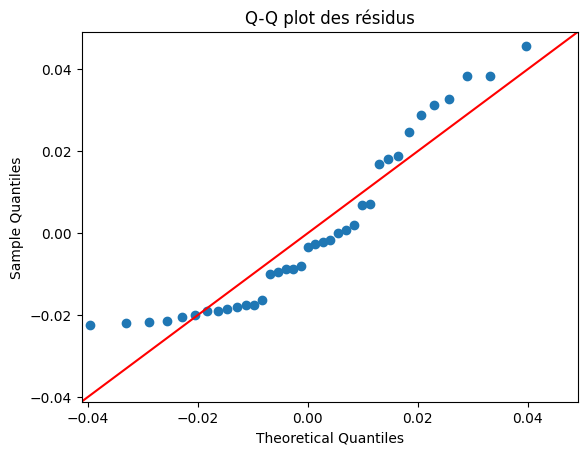

In [60]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
figsize = (20, 10)
plt.figure(figsize=figsize)
sm.qqplot(residus,loc=residus.mean(),scale=residus.std(),line='45')
plt.title('Q-Q plot des résidus')
plt.show()

# **Homoscédasticité des Résidus**

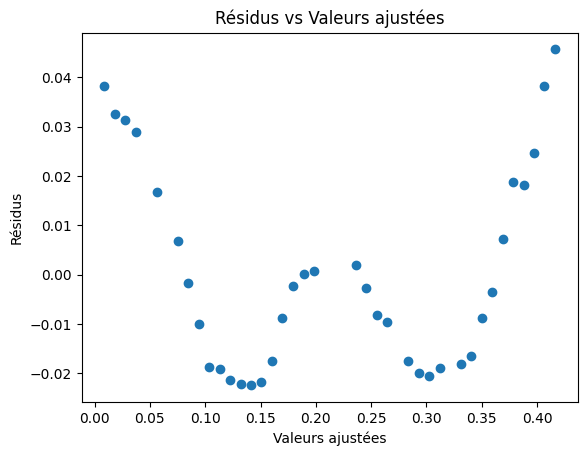

In [61]:
import matplotlib.pyplot as plt
plt.scatter(modele.fittedvalues,modele.resid)
plt.title('Résidus vs Valeurs ajustées')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.show()

In [64]:
# Test de Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residus, modele.model.exog)

labels = ['Statistique LM', 'p-value LM', 'Statistique F', 'p-value F']
print(dict(zip(labels, bp_test)))

{'Statistique LM': np.float64(0.00259532627747161), 'p-value LM': np.float64(0.9593698692433409), 'Statistique F': np.float64(0.0024552105887578495), 'p-value F': np.float64(0.9607626203248427)}


In [ ]:
# prompt: Calcule la covariance entre le Temps et le V11 par Souche

# Calculate the covariance between 'Temps' and 'V11' for each 'Souche'
covariance_by_souche = df.groupby('Souche').apply(lambda x: x['Temps'].cov(x['V11']))

covariance_by_souche


<ipython-input-10-56781a1ca9b2>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  covariance_by_souche = df.groupby('Souche').apply(lambda x: x['Temps'].cov(x['V11']))


,0
Souche,
4010291G,0.558713
722 + FO 20+20,0.488012
VRB e2,0.558607


In [ ]:
# prompt: calcule une regresion linaire par souche entre Temps et V11

import statsmodels.formula.api as sm

# Assuming 'Temps' and 'V11' are numerical columns and 'Souche' is a categorical column
# Fit a linear regression model for each 'Souche'
results = {}
for souche in df['Souche'].unique():
    subset = df[df['Souche'] == souche]
    try:
        model = sm.ols('V11 ~ Temps', data=subset).fit()
        results[souche] = model
        print(f"Regression results for Souche {souche}:\n{model.summary()}")
    except Exception as e:
        print(f"Error fitting model for Souche {souche}: {e}")

# Accessing regression results for each 'Souche'
# Example: Access the R-squared value for 'Souche A'
# if 'A' in results:
#     print(results['A'].rsquared)


Regression results for Souche 4010291G:
                            OLS Regression Results                            
Dep. Variable:                    V11   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1007.
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.21e-24
Time:                        14:17:25   Log-Likelihood:                 69.972
No. Observations:                  32   AIC:                            -135.9
Df Residuals:                      30   BIC:                            -133.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [ ]:
import numpy as np
X=np.random.exponential(size=100)
y=np.random.exponential(size=100)

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X,).fit()
print(model .summary())








                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.428
Date:                Fri, 14 Mar 2025   Prob (F-statistic):              0.235
Time:                        14:46:34   Log-Likelihood:                -133.98
No. Observations:                 100   AIC:                             272.0
Df Residuals:                      98   BIC:                             277.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1644      0.134      8.681      0.0

In [ ]:
import numpy as np
X=np.random.exponential(size=100)
y=np.random.exponential(size=100)

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X,).fit()
# Use model.summary().as_html() instead of model().as_html() to access the HTML representation of the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9512
Date:                Fri, 14 Mar 2025   Prob (F-statistic):              0.332
Time:                        14:47:00   Log-Likelihood:                -133.84
No. Observations:                 100   AIC:                             271.7
Df Residuals:                      98   BIC:                             276.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8451      0.137      6.169      0.0

In [ ]:
model.resid.mean()

9.769962616701378e-17